# Load stuff, define & run sim

In [1]:
using Revise,Unitful,LoggingExtras,Dates,Formatting,DifferentialEquations,TerminalLoggers
using Distributed,BenchmarkTools

@everywhere using Damysos
@everywhere using StaticArrays


import Damysos.getshortname
import Damysos.ensurepath
import Damysos.buildrhs_cc_cv_x_expression

Precompiling Damysos
  ✓ Damysos
  1 dependency successfully precompiled in 47 seconds. 464 already precompiled.


In [2]:
function make_system()

    vf        = u"4.3e5m/s"
    freq      = u"5THz"
    m         = u"20.0meV"
    emax      = u"0.1MV/cm"
    tcycle    = uconvert(u"fs",1/freq) # 100 fs
    t2        = tcycle / 4             # 25 fs
    t1        = Inf*u"1s"
    σ         = u"800.0fs"

    # converged at
    # dt = 0.01
    # dkx = 1.0
    # dky = 1.0
    # kxmax = 175
    # kymax = 100

    dt      = 0.01
    dkx     = 1.0
    kxmax   = 175.0
    dky     = 1.0
    kymax   = 0.0

    us      = scaledriving_frequency(freq,vf)
    h       = GappedDirac(energyscaled(m,us))
    l       = TwoBandDephasingLiouvillian(h,Inf,timescaled(t2,us))
    df      = GaussianAPulse(us,σ,freq,emax)
    pars    = NumericalParams2d(dkx,dky,kxmax,kymax,dt,-5df.σ)
    obs     = [Velocity(h),Occupation(h)]

#  id      = sprintf1("%x",hash([h,df,pars,obs,us]))
    id      = "ref"
    name    = "Simulation{$(typeof(h.m))}(2d)reference"
    dpath   = "/home/how09898/phd/data/hhgjl/expressions_test/reference"
    ppath   = "/home/how09898/phd/plots/hhgjl/expressions_test/reference"

    return Simulation(l,df,pars,obs,us,id,dpath,ppath)
end

make_system (generic function with 1 method)

In [3]:
sim = make_system()

Simulation{Float64} (2d):
 TwoBandDephasingLiouvillian(GappedDirac)
   Hamiltonian: GappedDirac
   m: 6.077069791514504
   vF: 1.0
  t1: Inf
  t2: 0.25
 GaussianAPulse:
  σ: 4.0
  ν: 1.0
  ω: 6.283185307179586
  eE: 261.3140010351237
  φ: 0.0
  ħω: 6.283185307179586
 NumericalParams2d:
  dkx: 1.0
  dky: 1.0
  kxmax: 175.0
  kymax: 0.0
  dt: 0.01
  t0: -20.0
  rtol: 1.0e-10
  atol: 1.0e-12
  nkx: 351
  nky: 1
  nt: 4001
  tsamples: -20.0:0.01:20.0
  tspan: (-20.0, 20.0)
  kxsamples: -175.0:1.0:175.0
  kysamples: 0.0:1.0:0.0
 Observables:
  Velocity
  Occupation
 UnitScaling:
  timescale: 200.0 fs
  lengthscale: 86.0 nm
 id: "ref"
 datapath: "/home/how09898/phd/data/hhgjl/expressions_test/reference"
 plotpath: "/home/how09898/phd/plots/hhgjl/expressions_test/reference"


In [4]:
const solver = LinearChunked(512)
const fns = define_functions(sim,solver)

((Damysos.var"#218#219"(), Damysos.var"#220#221"()), Damysos.var"#222#223"(), Damysos.var"#224#225"())

In [5]:
res = run!(sim,fns,solver)

┌ Info: ## Simulation{Float64}(2d)TwoBandDephasingLiouvillian(GappedDirac)_GaussianAPulse (id: ref)
│ 
│ Starting on **pc1011600110** at **2024-05-16T11:48:42.680**:
│ 
│ * threads: 16
│ * processes: 1
│ * plotpath: /home/how09898/phd/plots/hhgjl/expressions_test/reference
│ * datapath: /home/how09898/phd/data/hhgjl/expressions_test/reference
│ 
│ | Parameter | Value (SI units) | Value (scaled) |
│ |-----------|------------------|----------------|
│ | ζ | 13.2 |   |
│ | γ | 0.146 |   |
│ | M | 1.93 |   |
│ | plz | 0.641 |   |
│ | BZ(kx) | [-0.141 Å^-1,0.141 Å^-1]  |   |
│ | BZ(ky) | [0.0 Å^-1,0.0 Å^-1]  |   |
│ | m | 20.0 meV  | 6.077069791514504 |
│ | vF | 430000.0 m s^-1  | 1.0 |
│ | t2 | 50.0 fs  | 0.25 |
│ | σ | 800.0 fs  | 4.0 |
│ | ω | 0.0314 fs^-1  | 6.28 |
│ | ν | 5.0 THz  | 1.0 |
│ | eE | 0.1 MV cm^-1  | 261.0 |
│ | φ | 0.0  | 0.0 |
│ | ħω | 0.0207 eV  | 6.28 |
│ | kxmax | 0.203 Å^-1  | 175.0 |
│ | dkx | 0.00116 Å^-1  | 1.0 |
│ | nkx | 351.0  | 351.0 |
│ | kymax | 0.0 Å^-1  | 

fns = (Damysos.var"#218#219"(), Damysos.var"#220#221"(), Damysos.var"#222#223"(), Damysos.var"#224#225"())


[ Info: Saving simulation data
┌ Warning: Renamed /home/how09898/phd/data/hhgjl/expressions_test/reference/data.hdf5 to /home/how09898/phd/data/hhgjl/expressions_test/reference/data_old_jl_TC5Wz6bGLE.hdf5
└ @ Damysos /misc/rz_cloud/richter/how09898/.julia/dev/dev_damysos/src/Utility.jl:264
[ Info: Generating plots
[ Info: Plotting Velocity
[ Info: Plotting Occupation
[ Info: Plotting driving field
[ Info: Plotting bandstructure


2-element Vector{Observable{Float64}}:
 Velocity{Float64}([-2.1746735054528303e-15, -8.04426896002285e-8, -1.2404368588440986e-7, -1.3070234993241874e-7, -1.020287140315788e-7, -4.054397873749299e-8, 5.044630517720258e-8, 1.6727156168157145e-7, 3.0598157124498763e-7, 4.624885030731288e-7  …  0.0003781169337835108, 0.00037793283501541406, 0.0003777838501037185, 0.00037766972379007607, 0.00037759006435088445, 0.00037754433548151974, 0.0003775318835355468, 0.0003775519413118343, 0.0003776036278023596, 0.0003776859545931184], [-2.1746735054528303e-15, 1.002772788390395e-15, -1.3419557495090948e-15, 4.523691295673802e-16, -2.629590716855419e-15, 2.6645312230364547e-16, 3.874513722533581e-16, -1.4627171566707722e-15, -1.8056411468251793e-15, 1.2499793222913029e-15  …  0.0003781168762148704, 0.00037793277157607537, 0.0003777837740159635, 0.0003776696274432619, 0.0003775899398523979, 0.00037754418826780396, 0.0003775317240780734, 0.0003775517787869394, 0.0003776034700912441, 0.0003776858082818

In [6]:
using CSV,DataFrames,CairoMakie

path="/home/how09898/Desktop/reference1d.csv"
df = DataFrame(CSV.File(path));

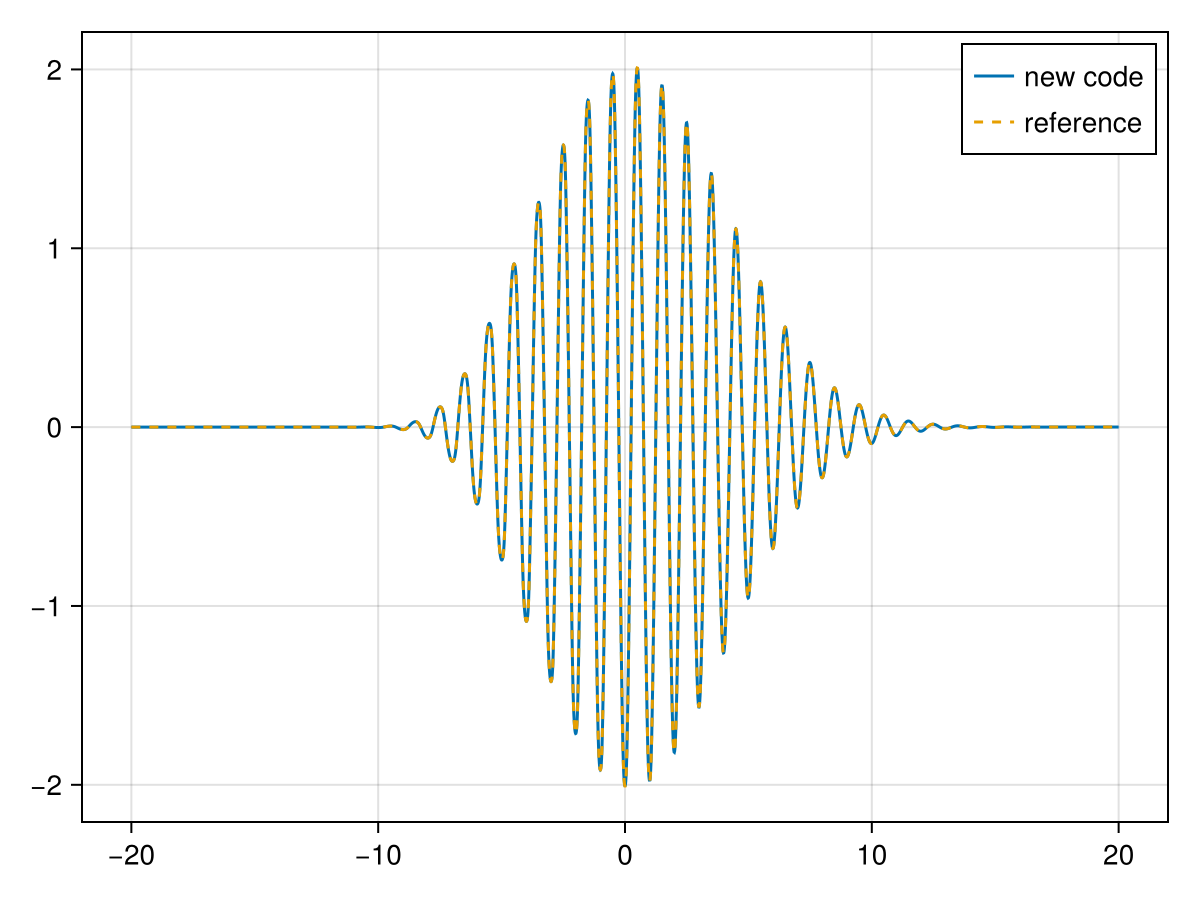

In [7]:
fig,ax,pl = lines(gettsamples(sim),res[1].vxintra,label="new code")
lines!(ax,df.t,df.vxintra ./(4π^2),label="reference",linestyle=:dash)
axislegend(ax)
fig

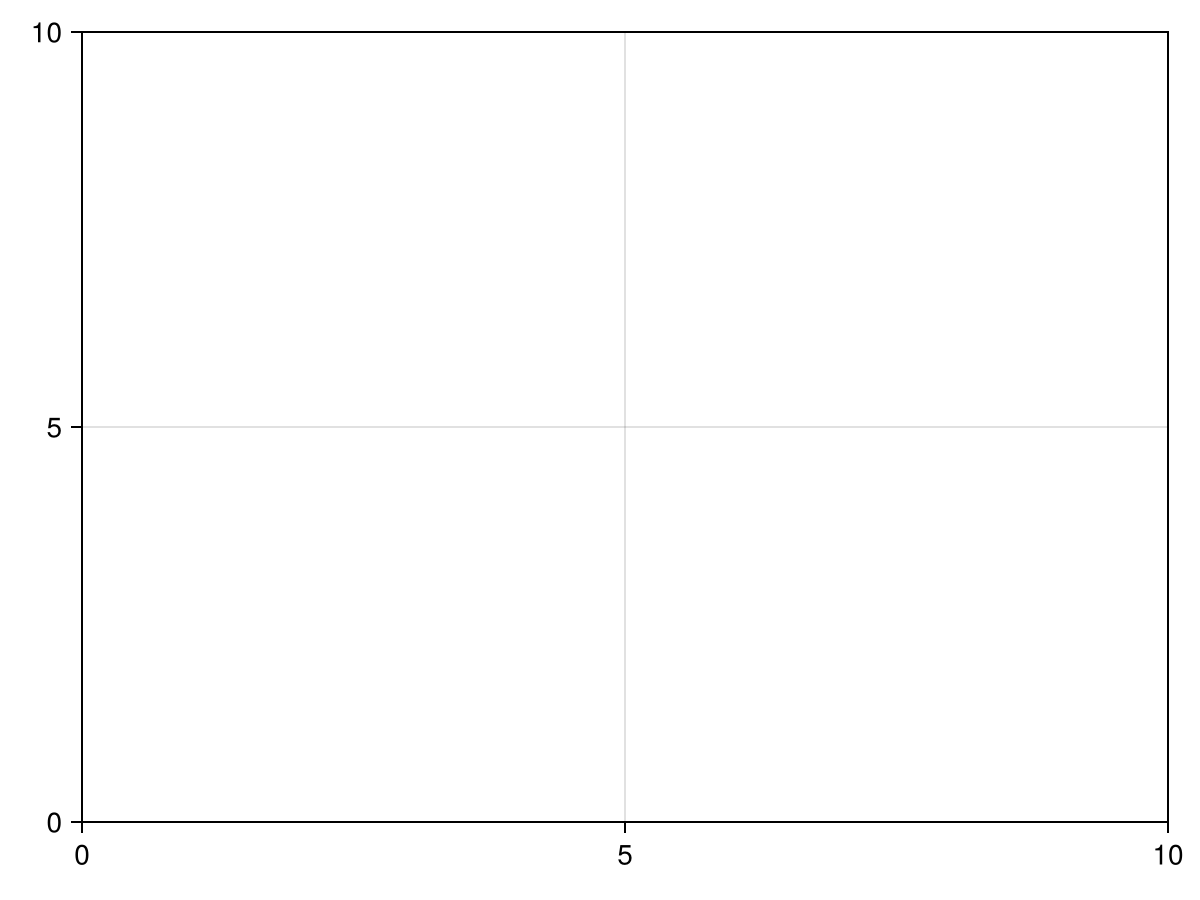

In [8]:
fig,ax,pl = lines(gettsamples(sim),res[1].vyintra / maximum(res[1].vyintra))
lines!(ax,df.t,df.vyintra / maximum(df.vyintra))
fig

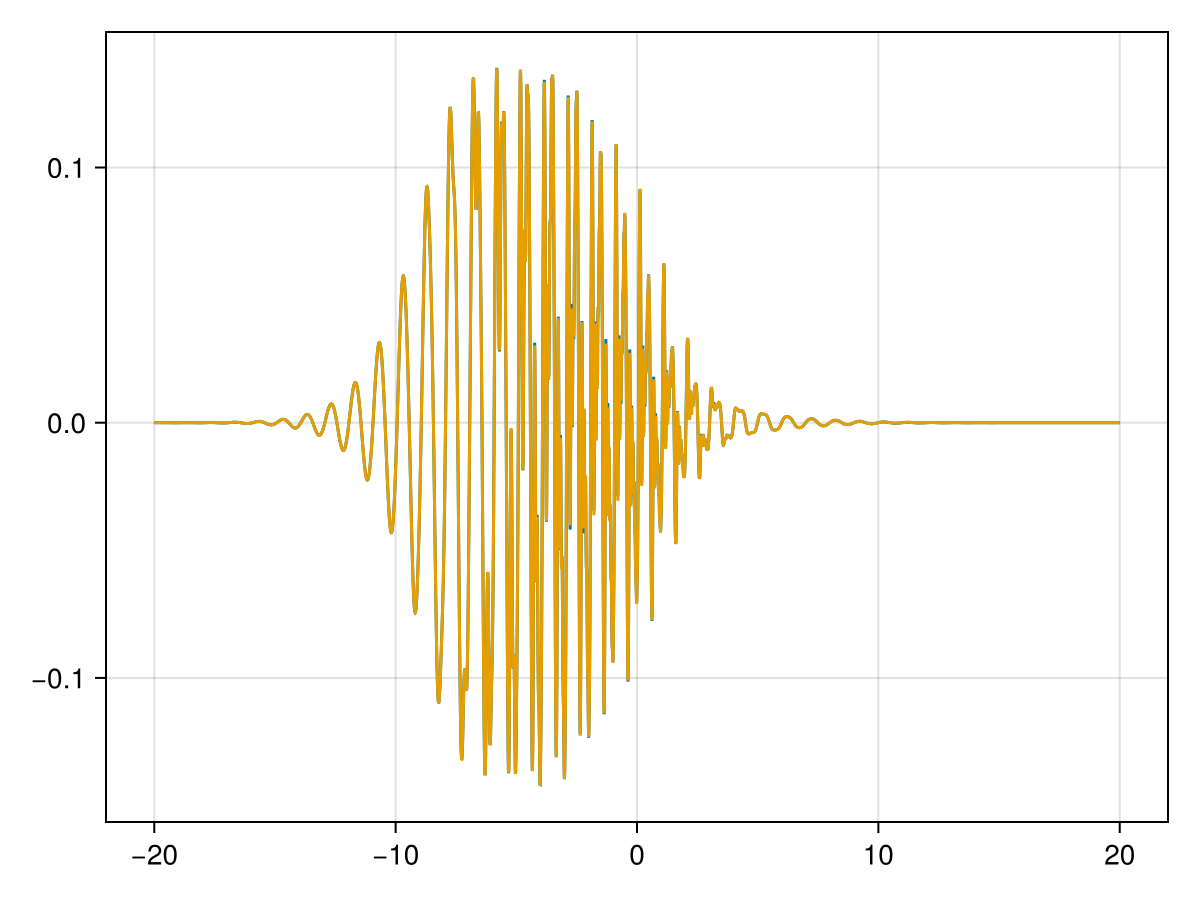

In [9]:
fig,ax,pl = lines(gettsamples(sim),res[1].vyinter)
lines!(ax,df.t,df.vyinter ./(4π^2))
fig

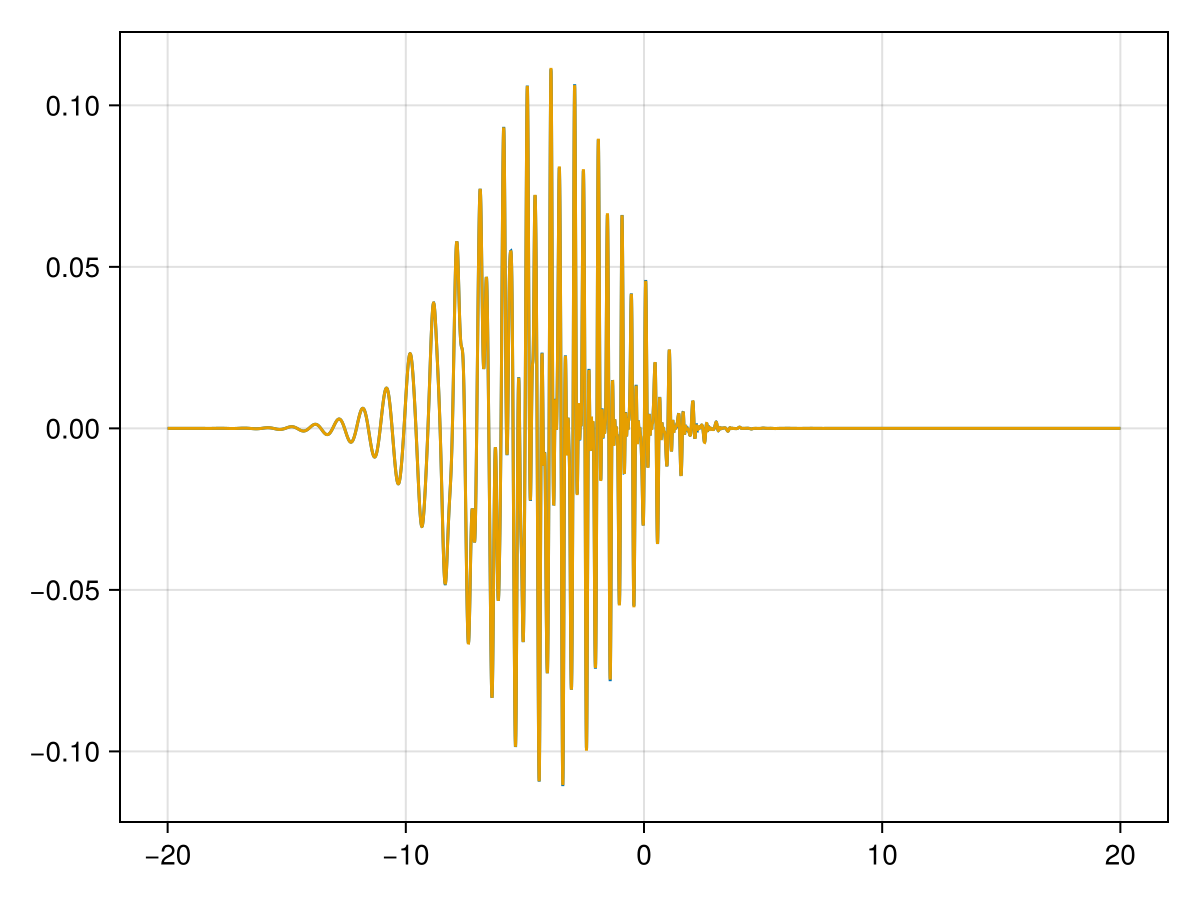

In [11]:
fig,ax,pl = lines(gettsamples(sim),res[1].vxinter)
lines!(ax,df.t,df.vxinter ./(4π^2))
fig

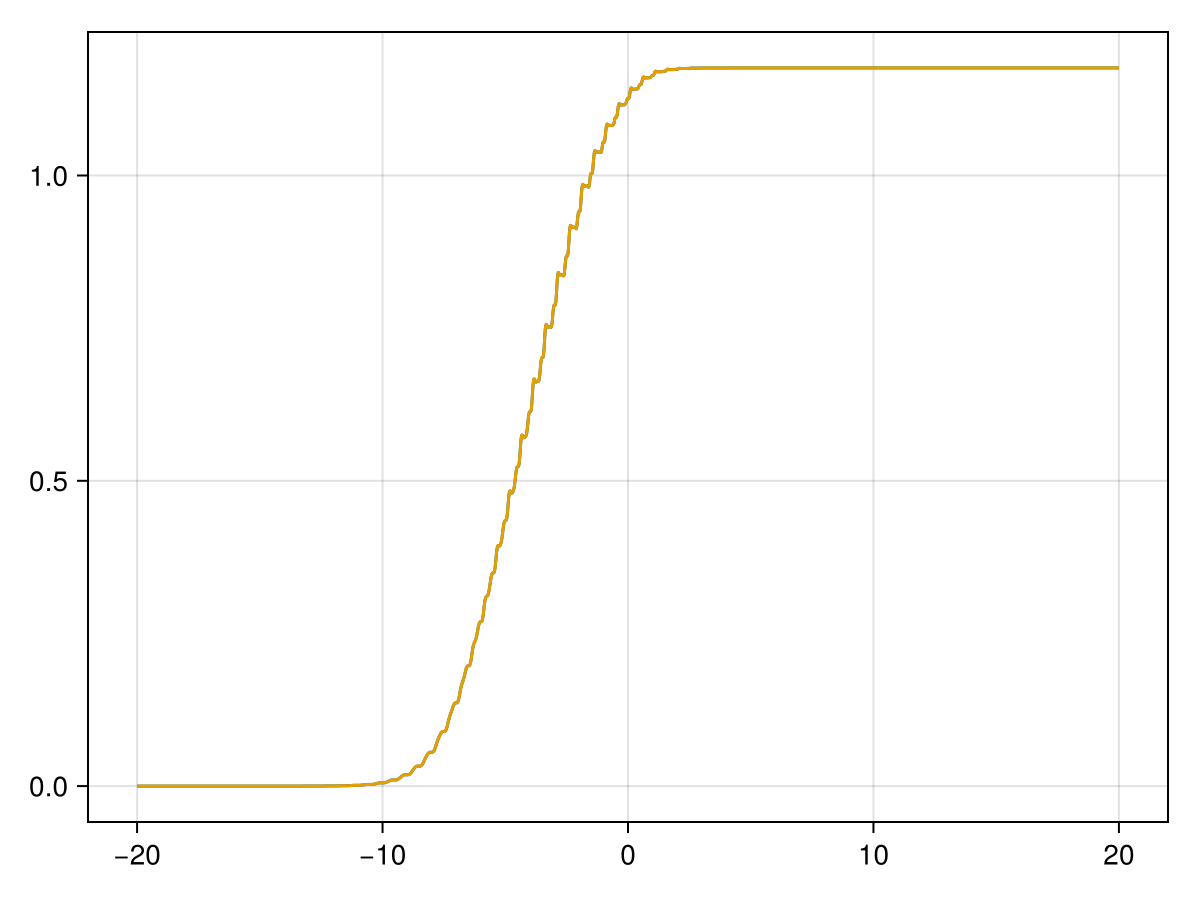

In [12]:
fig,ax,pl = lines(gettsamples(sim),res[2].cbocc )
lines!(ax,df.t,df.cbocc ./(4π^2))
fig

# Compare ODE solutions

In [125]:
fns

((Damysos.var"#216#217"(), Damysos.var"#218#219"()), Damysos.var"#220#221"(), Damysos.var"#222#223"())

In [126]:
functions=(fns[1][1],fns[1][2],fns[2:end]...)

(Damysos.var"#216#217"(), Damysos.var"#218#219"(), Damysos.var"#220#221"(), Damysos.var"#222#223"())

In [127]:
kb = Damysos.buildkgrid_chunks(sim,1000)[1]
prob = Damysos.buildode(sim,LinearChunked(1000),kb,fns[1][1],fns[1][2])
ens = EnsembleProblem(
        prob,
        prob_func   = let kb=kb
            (prob,i,repeat) -> remake(
                prob,
                p = kb,
                u0 = zeros(Complex{eltype(kb[i][1])},2length(kb)))
    end)

EnsembleProblem with problem ODEProblem

In [128]:
sols = solve(
        ens,
        nothing,
        solver.algorithm;
        trajectories = 1,
        saveat = gettsamples(sim.numericalparams),
        abstol = sim.numericalparams.atol,
        reltol = sim.numericalparams.rtol);

In [140]:
sol = sols[1][2]

702-element Vector{ComplexF64}:
  8.536094593735193e-21 + 0.0im
 2.6840067918207833e-11 + 8.603346835439607e-11im
  8.859515443913766e-21 + 0.0im
 2.6372531450649008e-11 + 8.796376570126672e-11im
  9.195237848426191e-21 + 0.0im
 2.5875284527704444e-11 + 8.992484689567836e-11im
  9.543756629384874e-21 + 0.0im
  2.534747778954967e-11 + 9.191710022982209e-11im
  9.905588485381928e-21 + 0.0im
 2.4788239414468217e-11 + 9.394092071569083e-11im
 1.0281273070515593e-20 + 0.0im
 2.4196674368285544e-11 + 9.599671030374944e-11im
 1.0671374132761386e-20 + 0.0im
                        ⋮
 1.0281392348854147e-20 + 0.0im
 2.4196482808948068e-11 + 9.599735646218603e-11im
  9.905703360480731e-21 + 0.0im
 2.4788058108339524e-11 + 9.394155686250411e-11im
  9.543867273103014e-21 + 0.0im
 2.5347306453504744e-11 + 9.191772649078811e-11im
  9.195344425295187e-21 + 0.0im
  2.587512288597816e-11 + 8.992546339439132e-11im
  8.859618111482898e-21 + 0.0im
  2.637237923459788e-11 + 8.796437255920764e-11im
  8.5361

In [143]:
rho = [SA[cc,cv] for (cc,cv) in zip(sol[1:2:end],sol[2:2:end])]

351-element Vector{SVector{2, ComplexF64}}:
 [8.536094593735193e-21 + 0.0im, 2.6840067918207833e-11 + 8.603346835439607e-11im]
 [8.859515443913766e-21 + 0.0im, 2.6372531450649008e-11 + 8.796376570126672e-11im]
 [9.195237848426191e-21 + 0.0im, 2.5875284527704444e-11 + 8.992484689567836e-11im]
 [9.543756629384874e-21 + 0.0im, 2.534747778954967e-11 + 9.191710022982209e-11im]
 [9.905588485381928e-21 + 0.0im, 2.4788239414468217e-11 + 9.394092071569083e-11im]
 [1.0281273070515593e-20 + 0.0im, 2.4196674368285544e-11 + 9.599671030374944e-11im]
 [1.0671374132761386e-20 + 0.0im, 2.3571863622361654e-11 + 9.808487810993499e-11im]
 [1.1076480715305395e-20 + 0.0im, 2.291286333863373e-11 + 1.0020584065133125e-10im]
 [1.1497208424700144e-20 + 0.0im, 2.221870402012089e-11 + 1.0236002209087485e-10im]
 [1.1934200769963167e-20 + 0.0im, 2.1488389625220232e-11 + 1.0454785449146275e-10im]
 [1.238813057701955e-20 + 0.0im, 2.0720896644024763e-11 + 1.0676977807986184e-10im]
 [1.2859701483188693e-20 + 0.0im, 1.9

In [141]:
reinterpret(SVector{2,eltype(sols[1].u[2])},reshape(sols[1].u[2],(2,:)))

1×351 reinterpret(SVector{2, ComplexF64}, ::Matrix{ComplexF64}):
 [8.53609e-21+0.0im, 2.68401e-11+8.60335e-11im]  …  [8.53619e-21+0.0im, 2.68399e-11+8.60341e-11im]

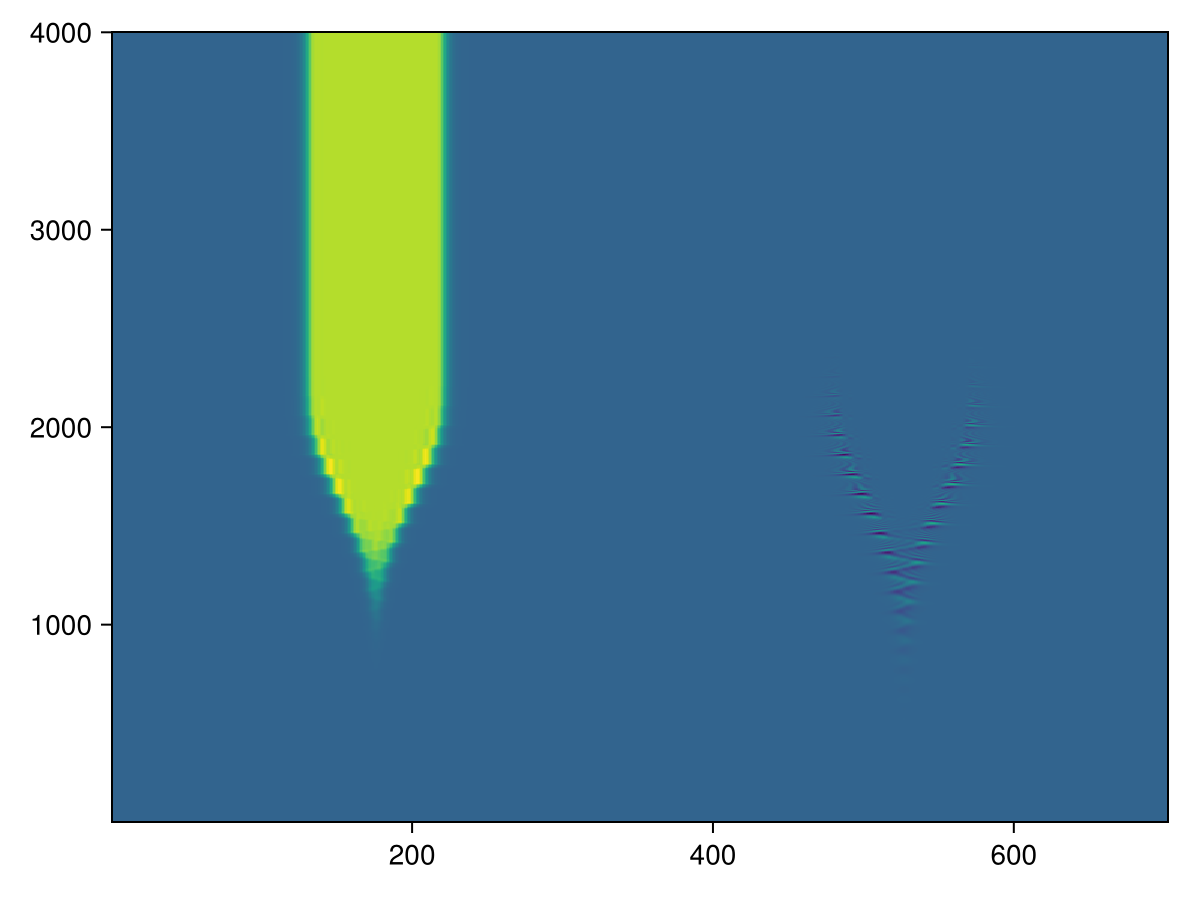

In [98]:
rhomat = hcat(sols[1].u...)
heatmap(real.( vcat(rhomat[1:2:end,:], rhomat[2:2:end,:])))

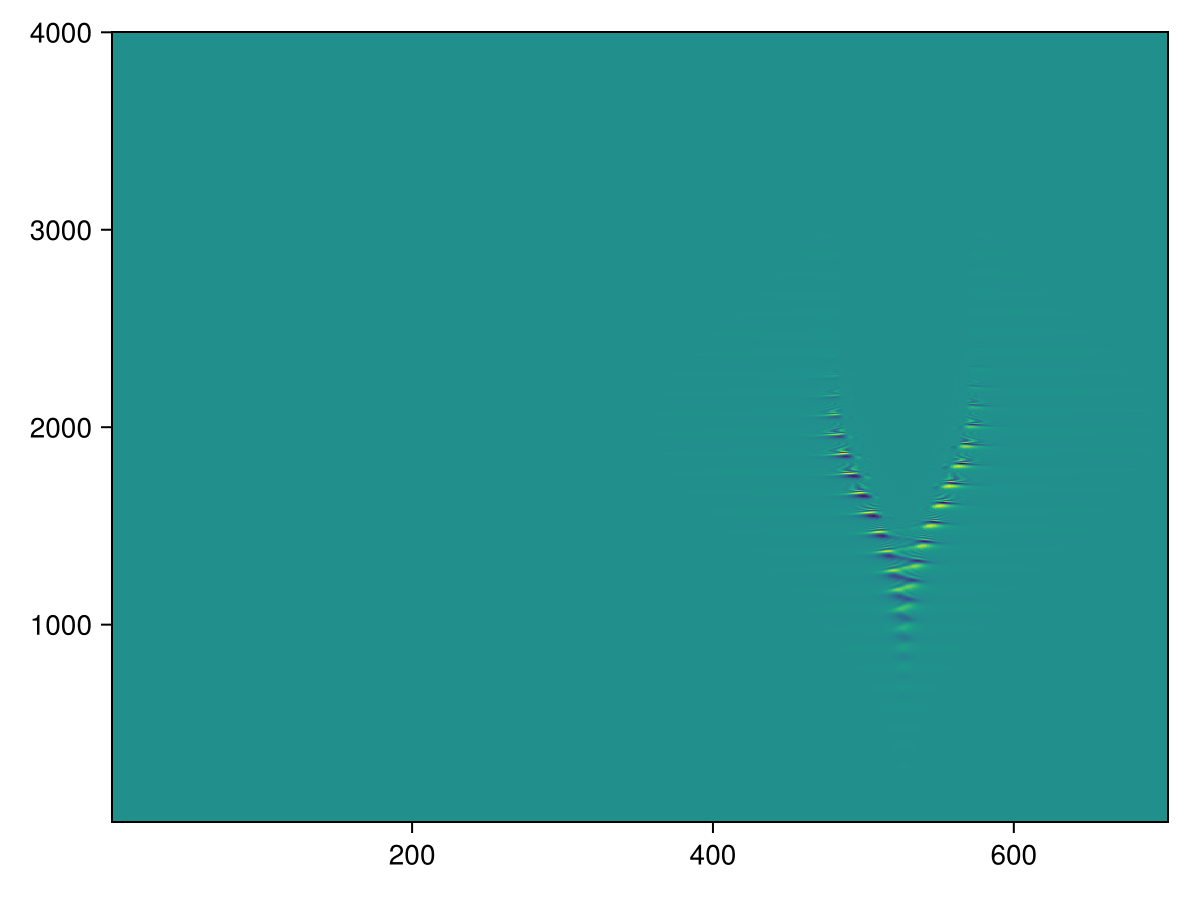

In [99]:
rhomat = hcat(sols[1].u...)
heatmap(imag.( vcat(rhomat[1:2:end,:], rhomat[2:2:end,:])))

## Build new observables_out function

In [144]:
import Damysos.buildode
import Damysos.buildkgrid_chunks

function observables_out(sol,bzmask,obsfunction)

    p       = sol.prob.p
    weigths = zeros(eltype(p[1]),length(p))
    obs     = []

    for (u,t) in zip(sol.u,sol.t)

        weigths .= bzmask.(p,t)
        #rho     = reinterpret(SVector{2,eltype(u)},reshape(u,(2,:)))'
        rho     = [SA[cc,cv] for (cc,cv) in zip(u[1:2:end],u[2:2:end])]
        push!(obs,sum(weigths .* obsfunction.(rho,p,t)))
    end 

    return (obs,false)
end


function buildensemble(
    sim::Simulation,
    solver::LinearChunked,
    rhs_cc::Function,
    rhs_cv::Function,
    bzmask::Function,
    obsfunction::Function)

    kbatches        = buildkgrid_chunks(sim,solver.kchunksize)
    prob            = buildode(sim,solver,kbatches[1],rhs_cc,rhs_cv)
    ensprob         = EnsembleProblem(
        prob,
        prob_func   = let kb=kbatches
            (prob,i,repeat) -> remake(
                prob,
                p = kb[i],
                u0 = zeros(Complex{eltype(kb[i][1])},2length(kb[i])))
        end,
        output_func = (sol,i) -> observables_out(sol,bzmask,obsfunction),
        reduction   = (u, data, I) -> (append!(u,sum(data)),false),
        safetycopy  = false)
    
    return ensprob,kbatches
end

function define_observable_functions(sim::Simulation,solver::LinearChunked)
    return [define_observable_functions(sim,solver,o) for o in sim.observables]
end

function define_observable_functions(sim::Simulation,::LinearChunked,o::Observable)
    return [@eval (u,p,t) -> $ex for ex in buildobservable_vec_of_expr(sim,o)]
end


buildensemble (generic function with 1 method)

In [145]:
of = fns[3]

#222 (generic function with 1 method)

In [146]:
ens,kbatches = buildensemble(sim,solver,functions...)
sols = solve(
        ens,
        nothing,
        solver.algorithm;
        trajectories = 1,
        saveat = gettsamples(sim.numericalparams),
        abstol = sim.numericalparams.atol,
        reltol = sim.numericalparams.rtol);

In [147]:
vyintershit = [r[1][4] for r in sols];
vxintrashit = [r[1][1] for r in sols];

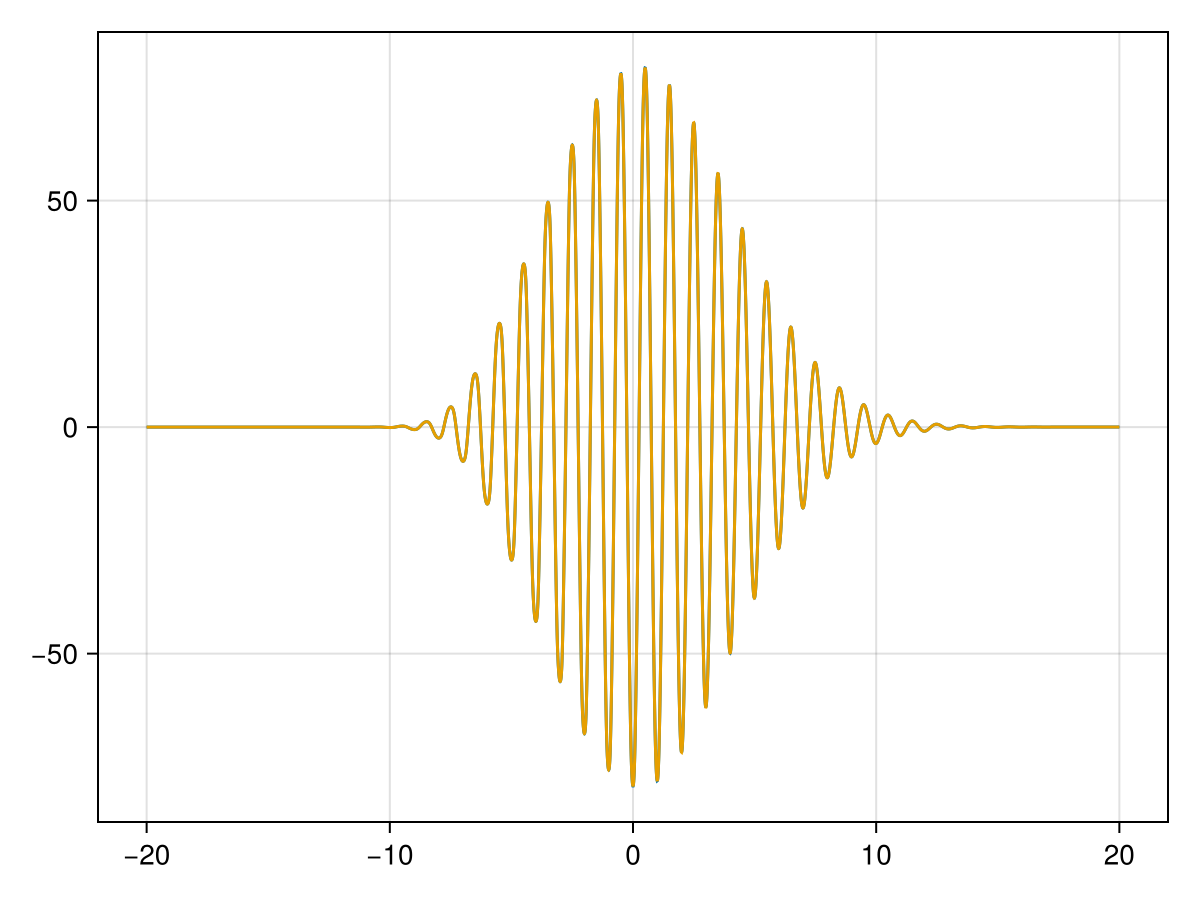

In [148]:
fig,ax,pl=lines(df.t,df.vxintra,label="old code")
lines!(ts,vxintrashit,label="reverse weigths")
fig

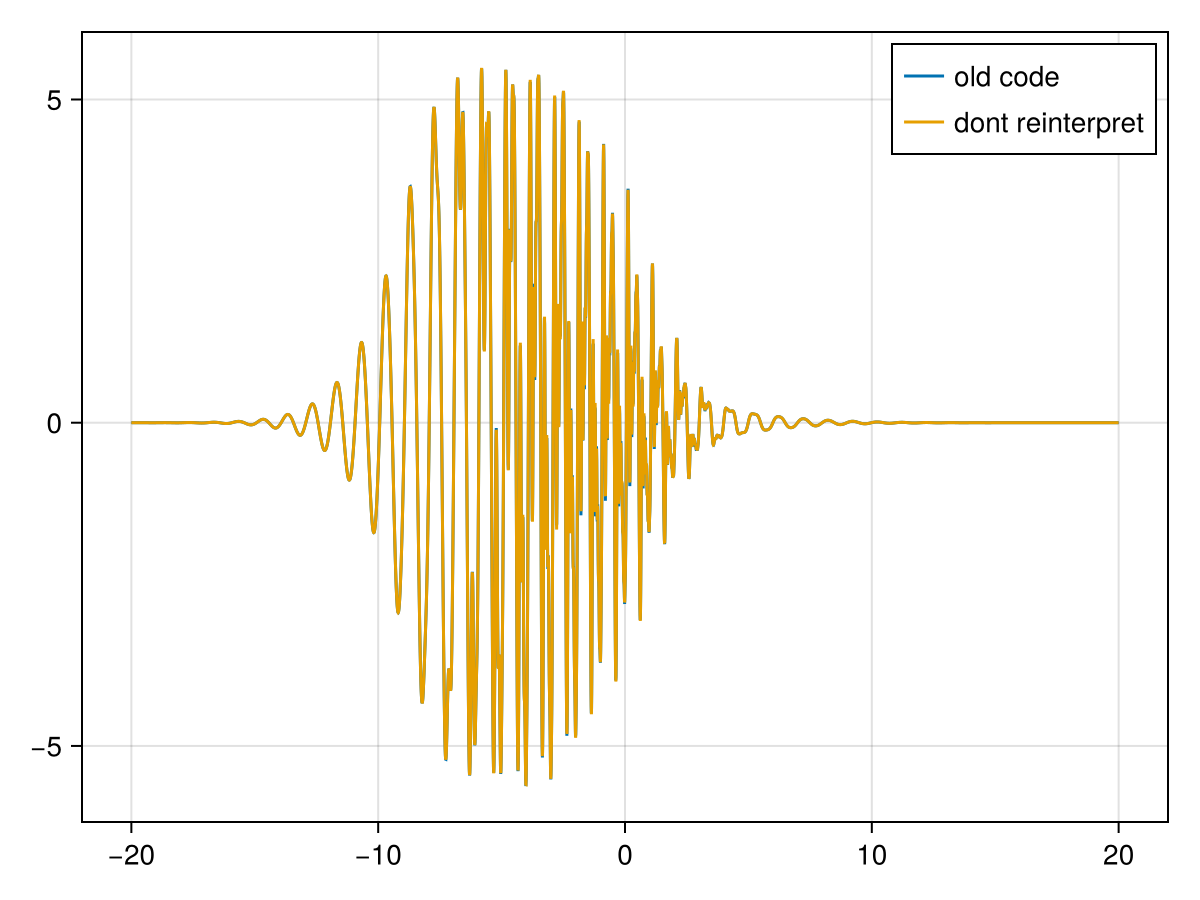

In [150]:
fig,ax,pl=lines(df.t,df.vyinter,label="old code")
lines!(ts,vyintershit,label="dont reinterpret")
axislegend(ax)
fig

# vyinter by hand

In [100]:
rhocc = real.(rhomat[1:2:end,:])
rhocv = rhomat[2:2:end,:]
@eval vyvc(kx,ky) = $(vy_vc(sim.liouvillian))
@eval a(t) = $(vecpotx(sim.drivingfield))

a (generic function with 1 method)

In [101]:
kxs = getkxsamples(sim) |> collect
kxt = kxs .- a.(gettsamples(sim))'
kyt = fill(0.0,size(kxt))

351×4001 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

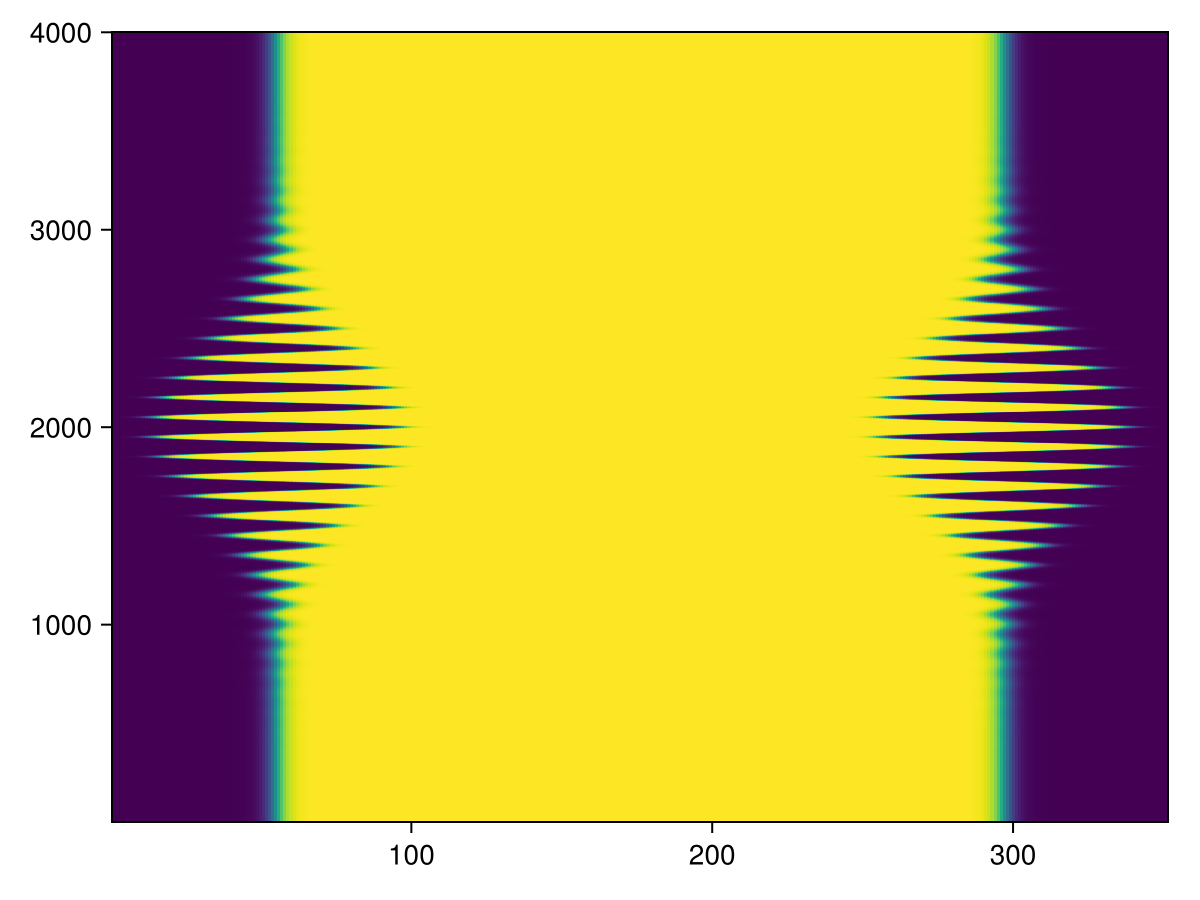

In [102]:
bz = fns[2]
weigths = bz.(kb,gettsamples(sim)')
heatmap(bz.(kb,gettsamples(sim)'))

In [103]:
vyinter = sum(weigths .* 2.0 .*  real.(vyvc.(kxt,kyt) .* rhocv),dims=1)

1×4001 Matrix{Float64}:
 0.0  -7.09871e-7  -2.07497e-6  …  8.47244e-8  1.65596e-7  2.35767e-7

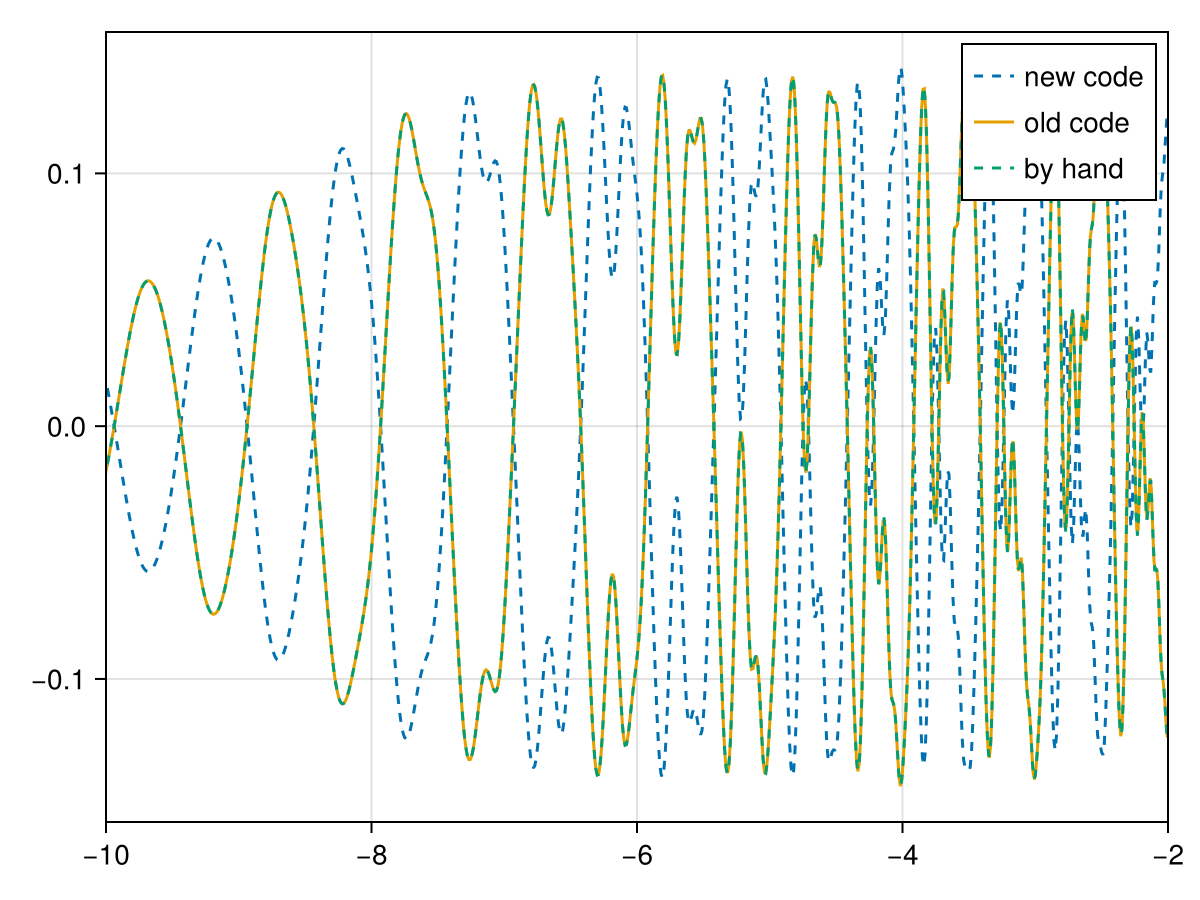

In [104]:
fig,ax,pl = lines(gettsamples(sim),res[1].vyinter,label="new code",linestyle=:dash)
lines!(ax,df.t,df.vyinter ./ (4π^2),label="old code")
lines!(ax,gettsamples(sim),vyinter[1,:] ./ (4π^2),label="by hand",linestyle=:dash)
axislegend(ax)
xlims!(ax,-10,-2)
fig

## Use vy of functions

In [105]:
vfunc = functions[4]

#222 (generic function with 1 method)

In [106]:
vfunc(rand(2),rand(2),rand())

2-element SVector{2, SArray{S, Float64, 1} where S<:Tuple} with indices SOneTo(2):
 [0.06766351858263164, 0.6413268418080491, 0.0005518954867999772, -0.006214425969994237]
 [0.5380372833227925]

In [107]:
vyinter_func(u,p,t) = vfunc(u,p,t)[1][4]
vyinter_wrap(cc,cv,kx,ky,t) = vyinter_func([cc,cv],[kx,ky],t)

vyinter_wrap (generic function with 1 method)

In [108]:
ts=collect(gettsamples(sim))
vyinter_byfns = sum(weigths .* vyinter_wrap.(rhocc,rhocv,kxt,kyt,ts'),dims=1)

1×4001 Matrix{Float64}:
 0.0  -7.09871e-7  -2.07497e-6  …  8.47244e-8  1.65596e-7  2.35767e-7

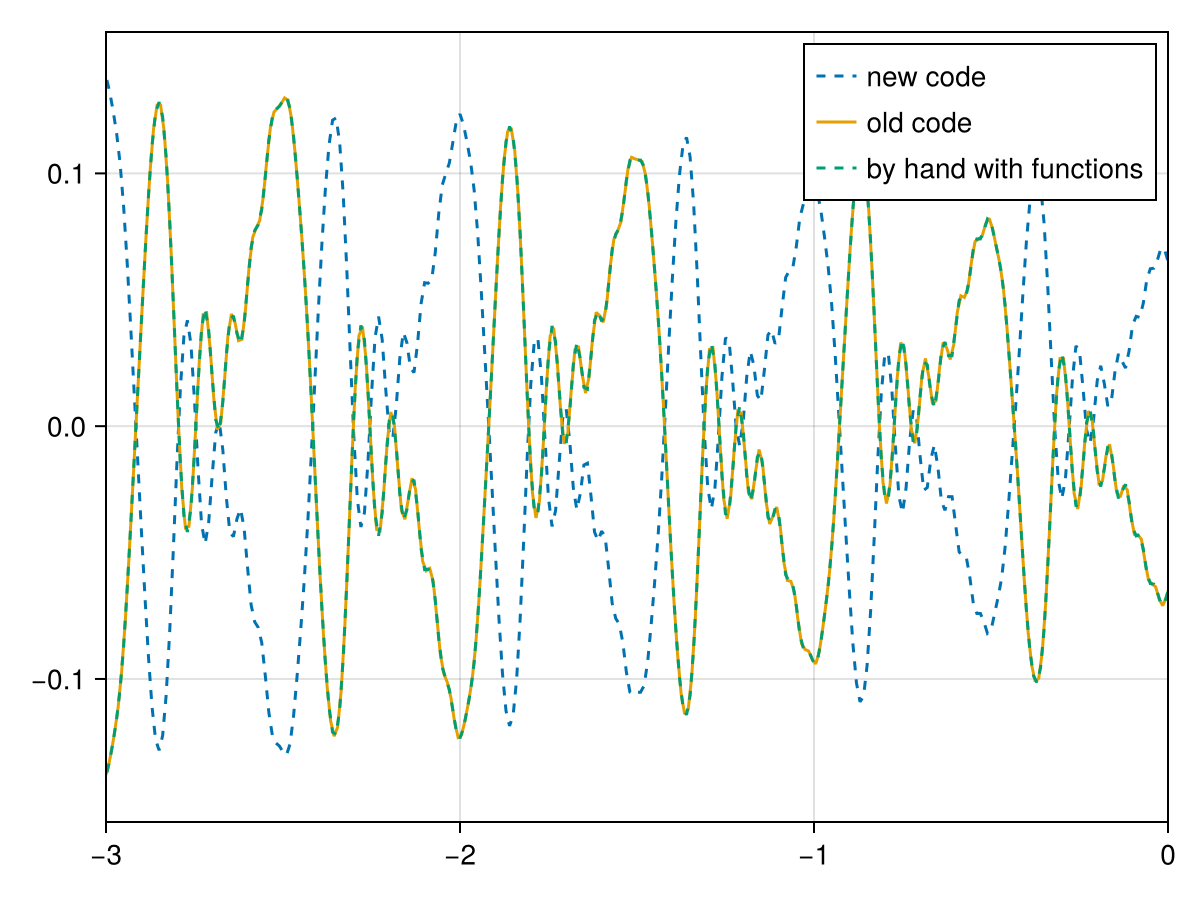

In [110]:
fig,ax,pl = lines(gettsamples(sim),res[1].vyinter,label="new code",linestyle=:dash)
lines!(ax,df.t,df.vyinter ./ (4π^2),label="old code")
lines!(ax,gettsamples(sim),vyinter_byfns[1,:] ./ (4π^2),label="by hand with functions",linestyle=:dash)
xlims!(ax,-3,0)
axislegend(ax)
fig

# What the hell

In [111]:
fns

((Damysos.var"#216#217"(), Damysos.var"#218#219"()), Damysos.var"#220#221"(), Damysos.var"#222#223"())

In [112]:
functions

(Damysos.var"#216#217"(), Damysos.var"#218#219"(), Damysos.var"#220#221"(), Damysos.var"#222#223"())

In [113]:
ens,kchunks = Damysos.buildensemble(sim,solver,functions...)

(EnsembleProblem{ODEProblem{Vector{ComplexF64}, Tuple{Float64, Float64}, true, Vector{SVector{2, Float64}}, ODEFunction{true, SciMLBase.AutoSpecialize, Damysos.var"#f#197"{Damysos.var"#216#217", Damysos.var"#218#219"}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing, Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, @NamedTuple{}}, SciMLBase.StandardODEProblem}, Damysos.var"#191#194"{Vector{Vector{SVector{2, Float64}}}}, Damysos.var"#192#195"{Damysos.var"#220#221", Damysos.var"#222#223"}, Damysos.var"#193#196", Nothing}(ODEProblem{Vector{ComplexF64}, Tuple{Float64, Float64}, true, Vector{SVector{2, Float64}}, ODEFunction{true, SciMLBase.AutoSpecialize, Damysos.var"#f#197"{Damysos.var"#216#217", Damysos.var"#218#219"}, LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, 

In [114]:
res2 = solve(
        ens,
        nothing,
        solver.algorithm;
        trajectories = length(kchunks),
        saveat = gettsamples(sim.numericalparams),
        abstol = sim.numericalparams.atol,
        reltol = sim.numericalparams.rtol)

EnsembleSolution Solution of length 4001 with uType:
Vector{Any}

In [115]:
vyinterens = [r[1][4] for r in res2]

4001-element Vector{Float64}:
  0.0
  7.098708180327692e-7
  2.074967562169453e-6
  3.2753820029284643e-6
  3.993268916105486e-6
  3.937778751849285e-6
  2.924776327904874e-6
  8.607002142595136e-7
 -2.345547969796698e-6
 -6.70656546818846e-6
 -1.2220066156264282e-5
 -1.886018132906395e-5
 -2.656181087003652e-5
  ⋮
  5.94769801529442e-7
  5.220522649601408e-7
  4.494301606947022e-7
  3.771242044040742e-7
  3.0535511175920614e-7
  2.3434359843096964e-7
  1.639289579706824e-7
  8.585460975295487e-8
  1.0313050397647083e-9
 -8.472443594745328e-8
 -1.6559609298714695e-7
 -2.357671458578796e-7

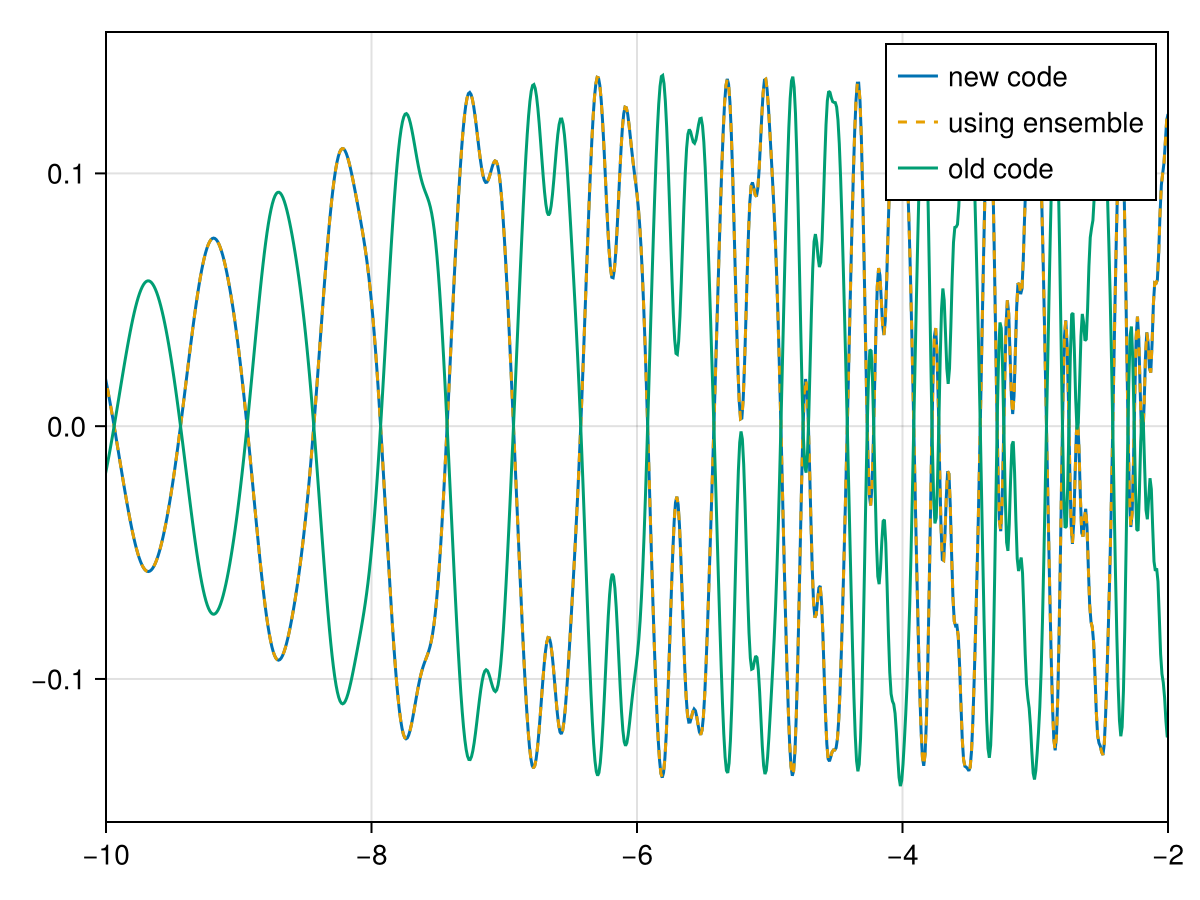

In [116]:
fig,ax,pl = lines(gettsamples(sim),res[1].vyinter,label="new code")
lines!(ax,gettsamples(sim),vyinterens ./ (4π^2),label="using ensemble",linestyle=:dash)
lines!(ax,df.t,df.vyinter ./ (4π^2),label="old code")
axislegend(ax)
xlims!(ax,-10,-2)
fig

# vxintra by hand

In [27]:
rhocc = real.(rhomat[1:2:end,:])
rhocv = rhomat[2:2:end,:]
@eval vxcc(kx,ky) = $(vx_cc(sim.liouvillian))
@eval vxvv(kx,ky) = $(vx_vv(sim.liouvillian))
@eval a(t) = $(vecpotx(sim.drivingfield))

a (generic function with 1 method)

In [40]:
kxs = getkxsamples(sim) |> collect
kxt = kxs .- a.(gettsamples(sim))'
kyt = fill(0.0,size(kxt))

351×4001 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

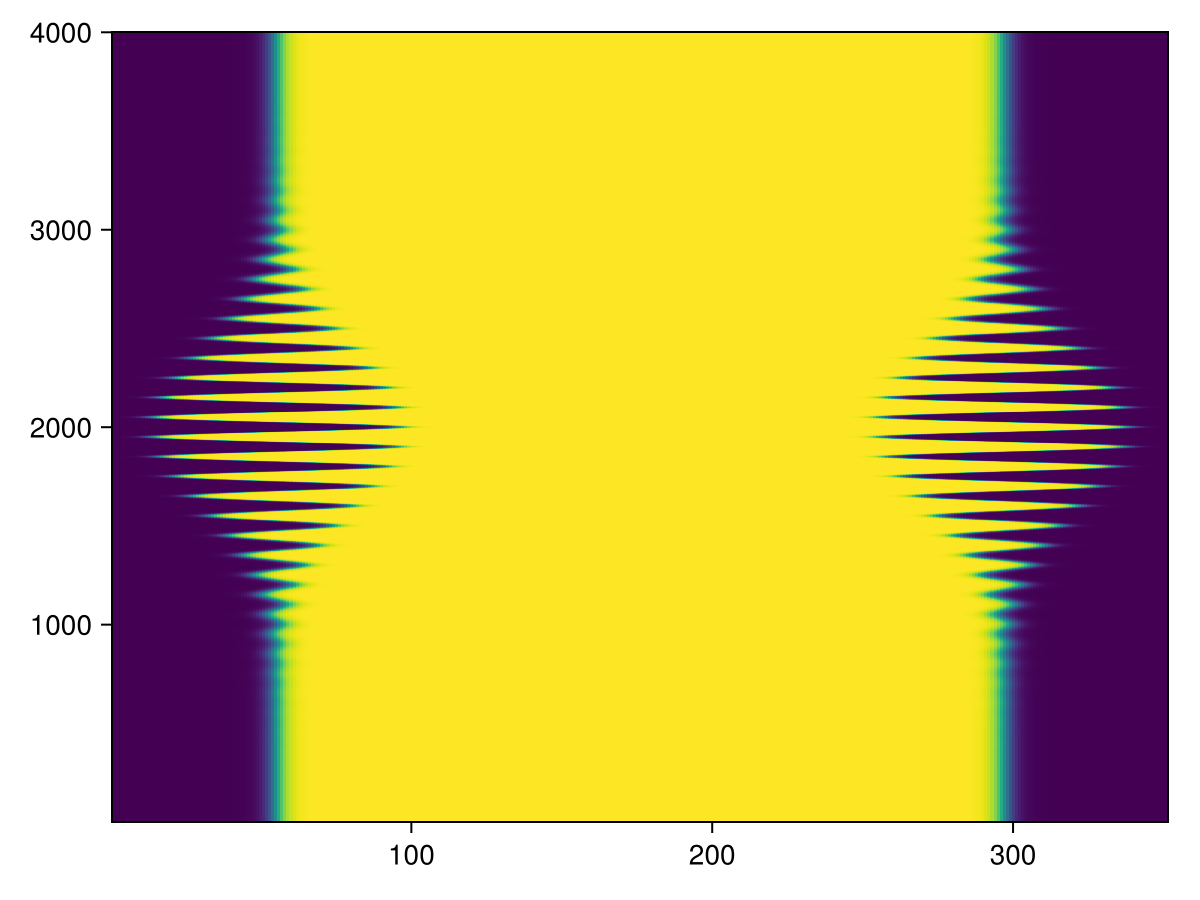

In [25]:
bz = fns[2]
weigths = bz.(kb,gettsamples(sim)')
heatmap(bz.(kb,gettsamples(sim)'))

In [44]:
rhovv = 1.0 .- rhocc
vxintra = sum(weigths .* (vxcc.(kxt,kyt) .* rhocc .+ vxvv.(kxt,kyt) .* rhovv),dims=1)

1×4001 Matrix{Float64}:
 4.90994e-15  -8.0166e-15  -1.98968e-15  …  0.0149051  0.0149072  0.0149104

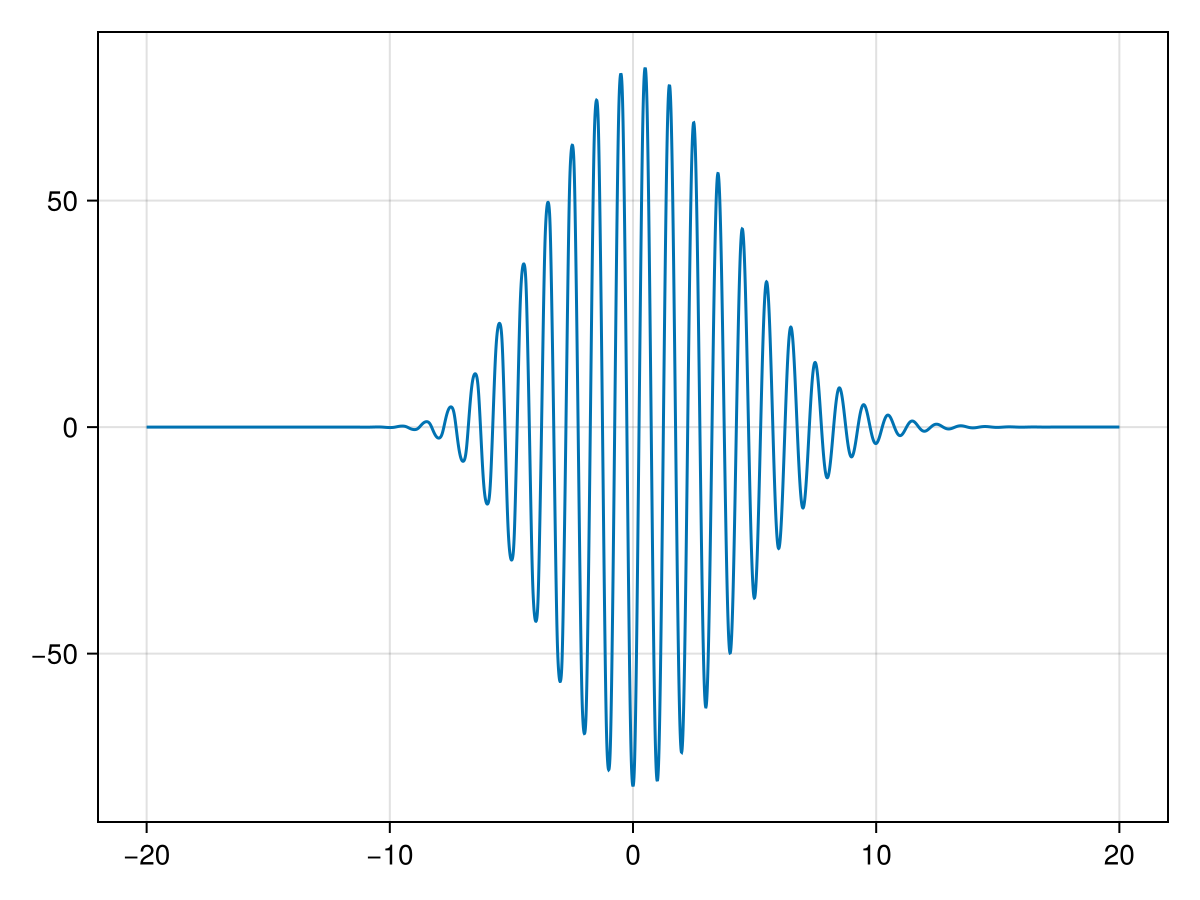

In [ ]:
lines(gettsamples(sim),vxintra[1,:])

## Use vx of functions

In [62]:
vxcc_hardcoded(rhocc,kx,ky,t) = fns[3]([rhocc,0.0im],[kx,ky],t)[1][1]
vxvv_hardcoded(

vxintra_hardcoded (generic function with 2 methods)

In [65]:
vxintra_hardcoded(0.2,0.1,10.0,0.5)

-0.5773439169986392

# Compare saved results

In [15]:
path = "/home/how09898/phd/data/hhgjl/expressions_test/reference/data.csv"
df   = DataFrame(CSV.File(path));

In [16]:
path = "/home/how09898/.julia/dev/dev_damysos/expressions_test/reference_revertedcommit/data.csv"
df2  = DataFrame(CSV.File(path));

In [7]:
using CairoMakie

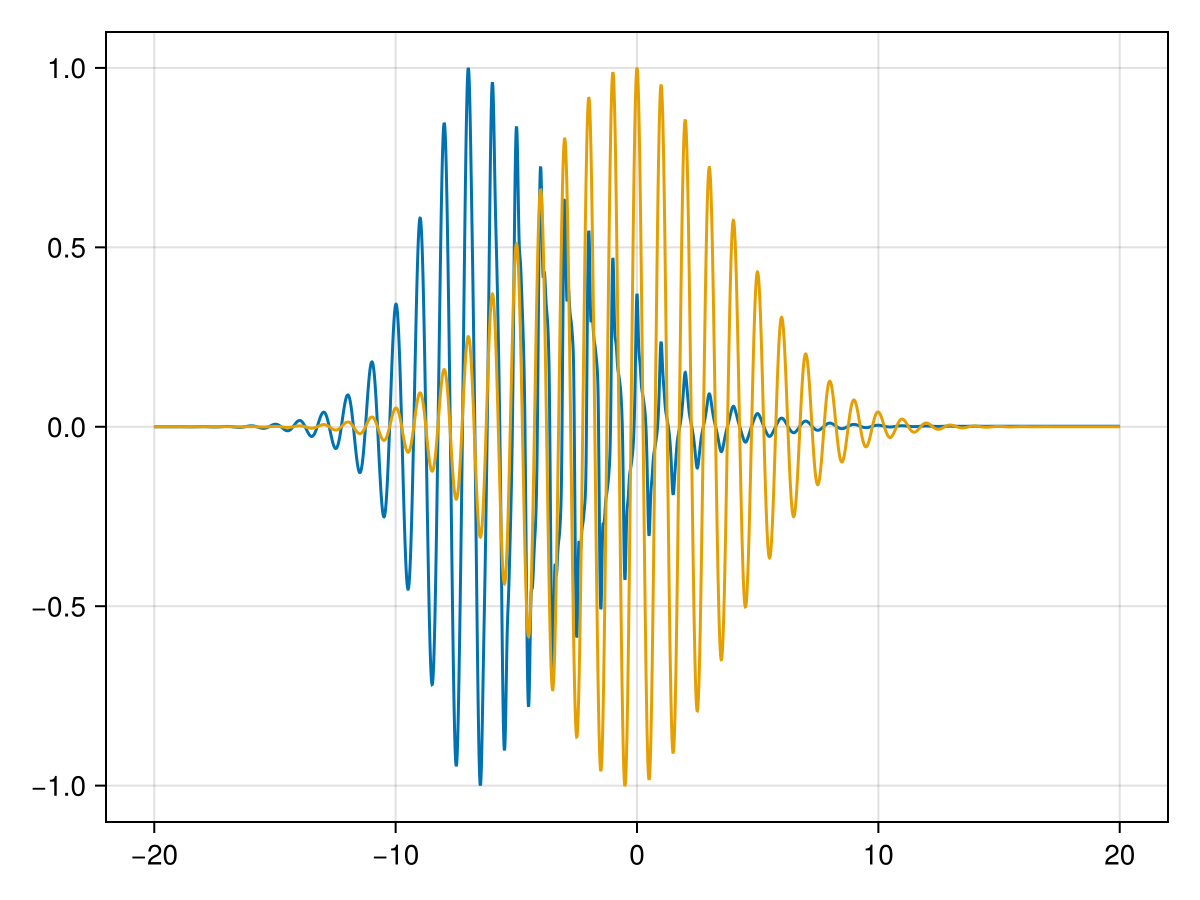

In [22]:
fig,ax,pl = lines(df.t,df.vxintra/maximum(df.vxintra))
ts = gettsamples(sim)
lines!(ax,df2.t,df2.vxintra/maximum(df2.vxintra))
fig

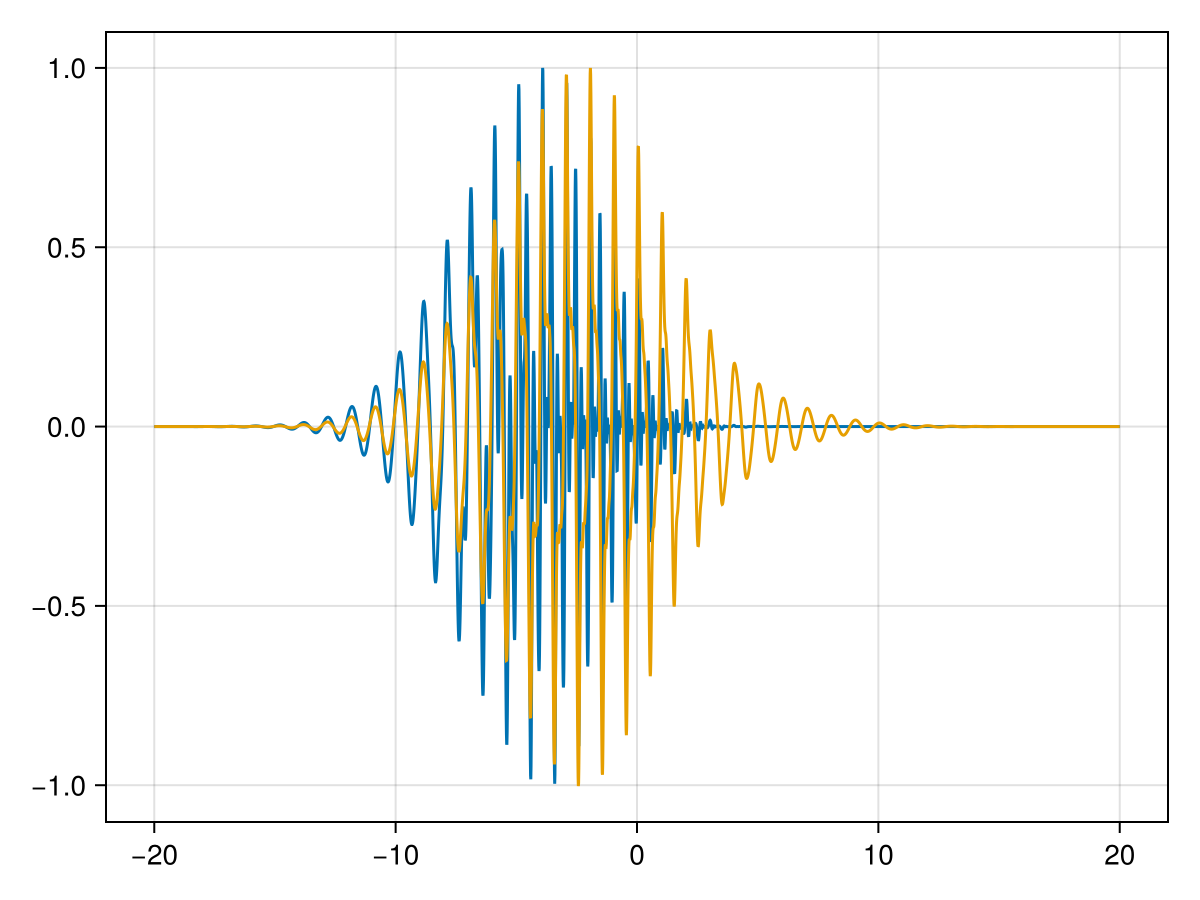

In [23]:
fig,ax,pl = lines(df.t,df.vxinter/maximum(df.vxinter))
ts = gettsamples(sim)
lines!(ax,df2.t,df2.vxinter/maximum(df2.vxinter))
fig

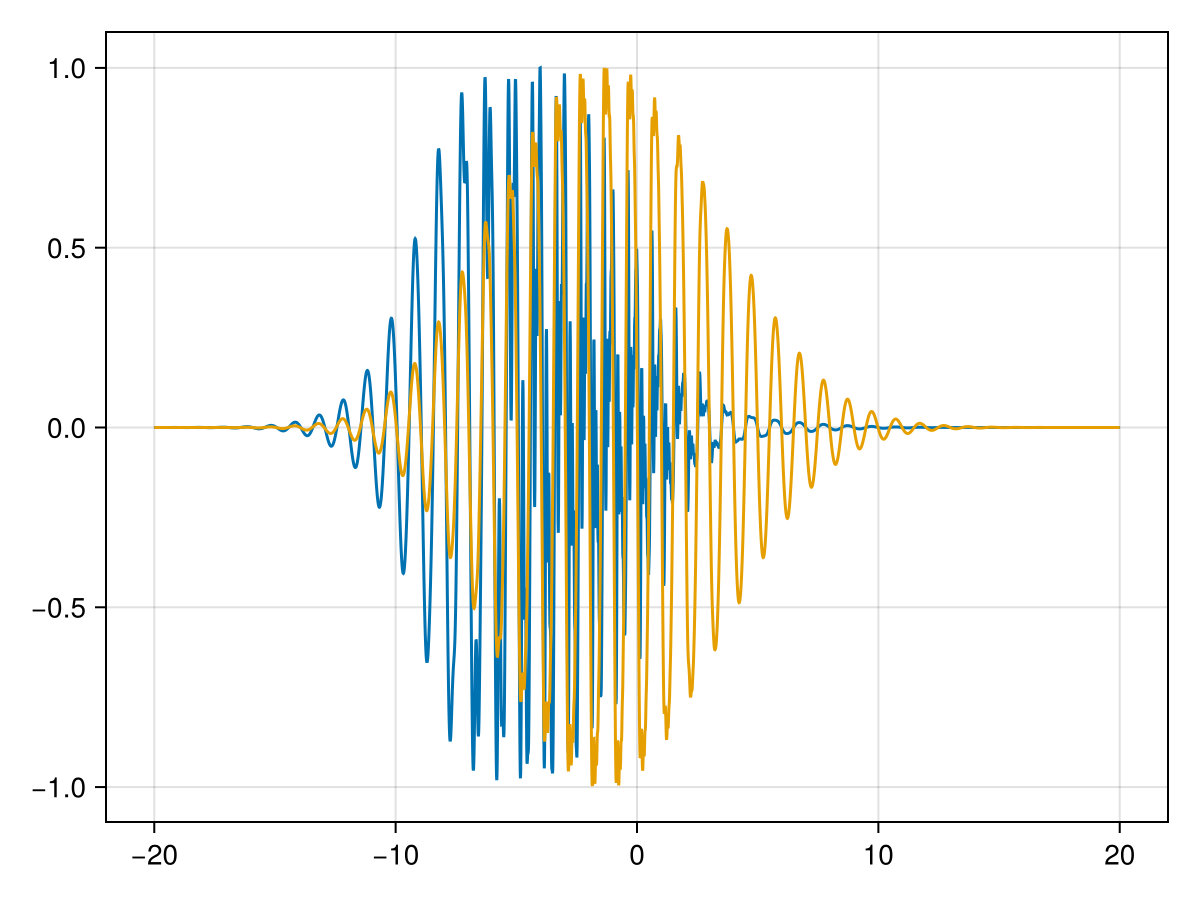

In [24]:
fig,ax,pl = lines(df.t,df.vy/maximum(df.vy))
ts = gettsamples(sim)
lines!(ax,df2.t,df2.vy/maximum(df2.vy))
fig

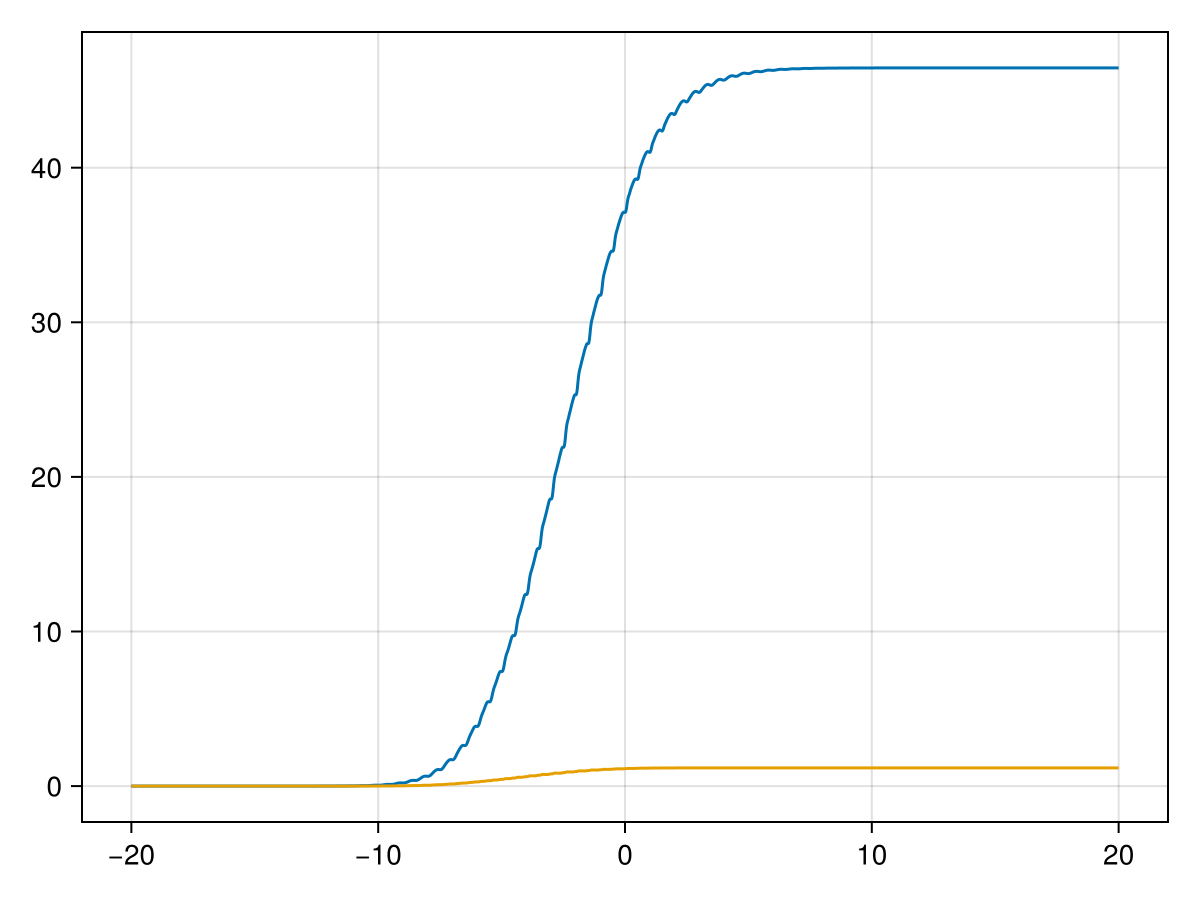

In [9]:
fig,ax,pl = lines(df.t,df.cbocc)
ts = gettsamples(sim)
lines!(ax,ts,res[2].cbocc)
fig